# 2 Assignment: Multi-Layer Perceptron


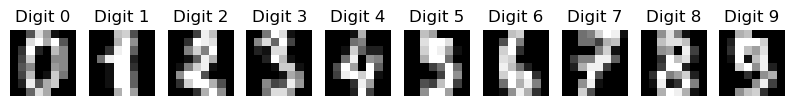

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np


dataset = load_digits()

# Step 1: Extract data into (input, target) tuples
data = [(image, target) for image, target in zip(dataset.images, dataset.target)]

# Step 2: Plot the images to check if they are correct
def plot_images(images, targets, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
        axes[i].set_title(f"Digit {targets[i]}")
        axes[i].axis('off')
    plt.show()
    

# Plot the first 5 images
# Assuming you have a list of 5 tuples in the 'data' variable
data_subset = data[:10]
# Unpack the tuples into separate lists using zip and *
unpacked_lists = zip(*data_subset)

# Pass the unpacked lists to the plot_images function
plot_images(*unpacked_lists)


In [3]:
# Step 3: Reshape images into vectors
# using flatten() function to flat the image data into a vertor 
data = [(image.flatten(), target) for image, target in data]
print(data[:5])
# Step 4: Rescale images to [0, 1] range
data = [(image.astype(np.float32) / 255.0, target) for image, target in data]

# Step 5: One-hot encode the target digits
encoder = OneHotEncoder(sparse_output=False, categories='auto')
targets = np.array([target for _, target in data]).reshape(-1, 1)
onehot_targets = encoder.fit_transform(targets)

# Step 6: Write a generator function
def data_generator(data, batch_size):
    while True:
        np.random.shuffle(data)
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size]
            batch_inputs, batch_targets = zip(*batch_data)
            yield np.array(batch_inputs), np.array(batch_targets)

# Example usage of the generator
batch_size = 32
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_generator = data_generator(train_data, batch_size)
val_generator = data_generator(val_data, batch_size)

# You can now use train_generator and val_generator in your training loop
# For example:
# for epoch in range(num_epochs):
#     for batch_inputs, batch_targets in train_generator:
#         # Your training logic here

[(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0), (array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]), 1), (array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

# 2.2 Sigmoid Activation Function


In [31]:

class Sigmoid:
    def __call__(self, x):
        """
        Compute the sigmoid activation function.

        Parameters:
        - x: ndarray, shape (minibatch_size, num_units)
          Input array.

        Returns:
        - ndarray, shape (minibatch_size, num_units)
          Output array after applying the sigmoid activation function element-wise.
        """
        return 1 / (1 + np.exp(-x))


# 2.3 Softmax activation function


In [ ]:
import numpy as np

class SoftmaxActivation:
    def __call__(self, x):
        """
        Compute the softmax activation function.

        Parameters:
        - x: ndarray, shape (minibatch_size, 10)
          Input array.

        Returns:
        - ndarray, shape (minibatch_size, 10)
          Output array after applying the softmax activation function element-wise.
        """
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        softmax_output = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return softmax_output


In [ ]:
import numpy as np

class MLPLayer:
    def __init__(self, activation_function, num_units, input_size):
        """
        Initialize the MLP layer.

        Parameters:
        - activation_function: object
          An instance of the activation function (SigmoidActivation or SoftmaxActivation).
        - num_units: int
          Number of units (perceptrons) in the layer.
        - input_size: int
          Number of units in the preceding layer.
        """
        self.activation_function = activation_function
        self.num_units = num_units
        self.input_size = input_size

        # Initialize weights with small random values and bias with zeros
        self.weights = np.random.normal(loc=0.0, scale=0.2, size=(input_size, num_units))
        self.bias = np.zeros((1, num_units))

    def forward(self, x):
        """
        Perform the forward pass of the MLP layer.

        Parameters:
        - x: ndarray, shape (minibatch_size, input_size)
          Input array.

        Returns:
        - ndarray, shape (minibatch_size, num_units)
          Output array after applying the weight matrix, bias, and activation function.
        """
        # Calculate pre-activations
        pre_activations = np.dot(x, self.weights) + self.bias

        # Apply activation function
        output = self.activation_function(pre_activations)

        return output


In [ ]:
import numpy as np

class CategoricalCrossEntropyLoss:
    def __call__(self, y_true, y_pred):
        """
        Compute the Categorical Cross-Entropy Loss.

        Parameters:
        - y_true: ndarray, shape (minibatch_size, num_classes)
          True labels (one-hot encoded).
        - y_pred: ndarray, shape (minibatch_size, num_classes)
          Predicted probabilities.

        Returns:
        - float
          Categorical Cross-Entropy Loss.
        """
        # Avoid numerical instability by adding a small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Compute the cross-entropy loss
        loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

        return loss
